Aula 1: ANÁLISE DE DADOS, PYTHON, PANDAS E NOVOS FÁRMACOS

O procedimento utilizado na imersão é definido conforme abaixo:

O pipeline do drug discovery
Tradicionalmente, a descoberta de novas drogas segue um percurso bem definido.

1 -  Seleção da doença a ser tratada
2 -  Identificação do alvo da droga
3 - Criação de molécula ou agentes biológicos em laboratório
4 - Triagem confrontando as substância com o alvo em busca de candidatos para futuro denvolvimento
5 - Testagem dos candidatos em modelos de doença (geralmente, colonias de células)


Aplicando as técnicas de data science  

As técnicas de ciência de dados e aprendizado de máquina podem nos ajudar a reaproveitar os dados de testes para encontrar novos usos para drogas já existentes ou para substâncias que não passaram em testes para outras doenças. Com isso, podemos usar o dataset a seguir para entender como algumas drogas potenciais alteram a expressão gênica - os alvos de droga dos experimentos.



Procedimento adotado na Aula 1

1: Importação do dataset, está que até o momento será nossa base principal

Importando dados pandas do github e plotando um dataset

In [1]:
import pandas as pd

url_dados = 'https://github.com/alura-cursos/imersaodados3/blob/main/dados/dados_experimentos.zip?raw=true'

dados_git = pd.read_csv(url_dados, compression = 'zip')
dados_git

,id,tratamento,tempo,dose,droga,g-0,g-1,g-2,g-3,g-4,g-5,g-6,g-7,g-8,g-9,g-10,g-11,g-12,g-13,g-14,g-15,g-16,g-17,g-18,g-19,g-20,g-21,g-22,g-23,g-24,g-25,g-26,g-27,g-28,g-29,g-30,g-31,g-32,g-33,g-34,...,c-60,c-61,c-62,c-63,c-64,c-65,c-66,c-67,c-68,c-69,c-70,c-71,c-72,c-73,c-74,c-75,c-76,c-77,c-78,c-79,c-80,c-81,c-82,c-83,c-84,c-85,c-86,c-87,c-88,c-89,c-90,c-91,c-92,c-93,c-94,c-95,c-96,c-97,c-98,c-99
0,id_000644bb2,com_droga,24,D1,b68db1d53,1.0620,0.5577,-0.2479,-0.6208,-0.1944,-1.0120,-1.0220,-0.0326,0.5548,-0.0921,1.1830,0.1530,0.5574,-0.4015,0.1789,-0.6528,-0.7969,0.6342,0.1778,-0.3694,-0.5688,-1.1360,-1.1880,0.6940,0.4393,0.2664,0.1907,0.1628,-0.2853,0.5819,0.2934,-0.5584,-0.0916,-0.3010,-0.1537,...,0.4805,0.4965,0.3680,0.8427,0.1042,0.1403,0.1758,1.2570,-0.5979,1.2250,-0.0553,0.7351,0.5810,0.9590,0.2427,0.0495,0.4141,0.8432,0.6162,-0.7318,1.2120,0.6362,-0.4427,0.1288,1.4840,0.1799,0.5367,-0.1111,-1.0120,0.6685,0.2862,0.2584,0.8076,0.5523,-0.1912,0.6584,-0.3981,0.2139,0.3801,0.4176
1,id_000779bfc,com_droga,72,D1,df89a8e5a,0.0743,0.4087,0.2991,0.0604,1.0190,0.5207,0.2341,0.3372,-0.4047,0.8507,-1.1520,-0.4201,-0.0958,0.4590,0.0803,0.2250,0.5293,0.2839,-0.3494,0.2883,0.9449,-0.1646,-0.2657,-0.3372,0.3135,-0.4316,0.4773,0.2075,-0.4216,-0.1161,-0.0499,-0.2627,0.9959,-0.2483,0.2655,...,0.4083,0.0319,0.3905,0.7099,0.2912,0.4151,-0.2840,-0.3104,-0.6373,0.2887,-0.0765,0.2539,0.4443,0.5932,0.2031,0.7639,0.5499,-0.3322,-0.0977,0.4329,-0.2782,0.7827,0.5934,0.3402,0.1499,0.4420,0.9366,0.8193,-0.4236,0.3192,-0.4265,0.7543,0.4708,0.0230,0.2957,0.4899,0.1522,0.1241,0.6077,0.7371
2,id_000a6266a,com_droga,48,D1,18bb41b2c,0.6280,0.5817,1.5540,-0.0764,-0.0323,1.2390,0.1715,0.2155,0.0065,1.2300,-0.4797,-0.5631,-0.0366,-1.8300,0.6057,-0.3278,0.6042,-0.3075,-0.1147,-0.0570,-0.0799,-0.8181,-1.5320,0.2307,0.4901,0.4780,-1.3970,4.6240,-0.0437,1.2870,-1.8530,0.6069,0.4290,0.1783,0.0018,...,-0.5477,-0.7576,-0.0444,0.1894,-0.0014,-2.3640,-0.4682,0.1210,-0.5177,-0.0604,0.1682,-0.4436,0.4963,0.1363,0.3335,0.9760,-0.0427,-0.1235,0.0959,0.0690,-0.9416,-0.7548,-0.1109,-0.6272,0.3019,0.1172,0.1093,-0.3113,0.3019,-0.0873,-0.7250,-0.6297,0.6103,0.0223,-1.3240,-0.3174,-0.6417,-0.2187,-1.4080,0.6931
3,id_0015fd391,com_droga,48,D1,8c7f86626,-0.5138,-0.2491,-0.2656,0.5288,4.0620,-0.8095,-1.9590,0.1792,-0.1321,-1.0600,-0.8269,-0.3584,-0.8511,-0.5844,-2.5690,0.8183,-0.0532,-0.8554,0.1160,-2.3520,2.1200,-1.1580,-0.7191,-0.8004,-1.4670,-0.0107,-0.8995,0.2406,-0.2479,-1.0890,-0.7575,0.0881,-2.7370,0.8745,0.5787,...,-2.1220,-0.3752,-2.3820,-3.7350,-2.9740,-1.4930,-1.6600,-3.1660,0.2816,-0.2990,-1.1870,-0.5044,-1.7750,-1.6120,-0.9215,-1.0810,-3.0520,-3.4470,-2.7740,-1.8460,-0.5568,-3.3960,-2.9510,-1.1550,-3.2620,-1.5390,-2.4600,-0.9417,-1.5550,0.2431,-2.0990,-0.6441,-5.6300,-1.3780,-0.8632,-1.2880,-1.6210,-0.8784,-0.3876,-0.8154
4,id_001626bd3,com_droga,72,D2,7cbed3131,-0.3254,-0.4009,0.9700,0.6919,1.4180,-0.8244,-0.2800,-0.1498,-0.8789,0.8630,-0.2219,-0.5121,-0.9577,1.1750,0.2042,0.1970,0.1244,-1.7090,-0.3543,-0.5160,-0.3330,-0.2685,0.7649,0.2057,1.3720,0.6835,0.8056,-0.3754,-1.2090,0.2965,-0.0712,0.6389,0.6674,-0.0783,1.1740,...,-0.2274,0.3215,0.1535,-0.4640,-0.5943,0.3973,0.1500,0.5178,0.5159,0.6091,0.1813,-0.4249,0.7832,0.6529,0.5648,0.4817,0.0587,0.5303,0.6376,-0.3966,-1.4950,-0.9625,-0.0541,0.6273,0.4563,0.0698,0.8134,0.1924,0.6054,-0.1824,0.0042,0.0048,0.6670,1.0690,0.5523,-0.3031,0.1094,0.2885,-0.3786,0.7125
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23809,id_fffb1ceed,com_droga,24,D2,df1d0a5a1,0.1394,-0.0636,-0.1112,-0.5080,-0.4713,0.7201,0.5773,0.3055,-0.4726,0.1269,0.2531,0.1730,-0.4532,-1.0790,0.2474,-0.4550,0.3588,0.1600,-0.7362,-0.1103,0.8550,-0.4139,0.5541,0.2310,-0.5573,-0.4397

É possível realizar qualquer tipo de fragmentação no dataset, abaixo a exibição de uma única coluna, denomidada Série do dataset

---



Série do dataset

In [2]:
dados_git["tratamento"]


0           com_droga
1           com_droga
2           com_droga
3           com_droga
4           com_droga
             ...     
23809       com_droga
23810       com_droga
23811    com_controle
23812       com_droga
23813       com_droga
Name: tratamento, Length: 23814, dtype: object

In [3]:
dados_git['tratamento'].unique()

array(['com_droga', 'com_controle'], dtype=object)

Grupo controle e grupo experimental, as condições entres os 2 tem que estar iguais para nao ter vies no resultado. 
(Utilizamos o controle para testes)

Desafio 01: Por que a classe tratamento é tão desbalanceada?

Ao analisar cada série do dataset é possível observar algumas diferenças discrepantes entre os dados/variáveis, e consequentemente nos intriga a querer saber um pouco mais das razões.

Para entendermos melhor e fazer um comparativo é legal traçarmos a proporção entre os dados. Vamos escrever o código agora, setando como parâmetro, dentro dos parênteses o normalize = True :


In [4]:
dados_git['tratamento'].value_counts(normalize = True)
# valores em Porcentagem


com_droga       0.921643
com_controle    0.078357
Name: tratamento, dtype: float64

Como visto acima a diferença entre casos com_droga e com_controle é bem grande, logo a primeiro questionamento é saber o por que


In [5]:
dados_git['tratamento'].value_counts()

com_droga       21948
com_controle     1866
Name: tratamento, dtype: int64

Etapas para solucionar a dúvida

1 - separar os casos com_controle para um novo 'dataset' ou algo similar.
2 - verificar a frequência das demais variáveis (dose, droga, tempo) juntamente com o tipo de tratamento

Para isso vamos utlizar o método query

In [6]:
sep_com_controle = dados_git.query('tratamento == "com_controle"')
sep_com_controle
# A variável criada aqui terá apenas os casos que foram tratados com controle
# assim é possível analisar o que mudou neste dataset


,id,tratamento,tempo,dose,droga,g-0,g-1,g-2,g-3,g-4,g-5,g-6,g-7,g-8,g-9,g-10,g-11,g-12,g-13,g-14,g-15,g-16,g-17,g-18,g-19,g-20,g-21,g-22,g-23,g-24,g-25,g-26,g-27,g-28,g-29,g-30,g-31,g-32,g-33,g-34,...,c-60,c-61,c-62,c-63,c-64,c-65,c-66,c-67,c-68,c-69,c-70,c-71,c-72,c-73,c-74,c-75,c-76,c-77,c-78,c-79,c-80,c-81,c-82,c-83,c-84,c-85,c-86,c-87,c-88,c-89,c-90,c-91,c-92,c-93,c-94,c-95,c-96,c-97,c-98,c-99
25,id_0054388ec,com_controle,48,D1,cacb2b860,-0.6696,-0.2718,-1.2230,-0.6226,-0.7220,0.1588,0.7785,0.7062,-0.7951,1.3770,0.2856,-0.8331,0.3879,1.3290,-0.4746,0.0857,-0.2745,-0.1093,0.2603,0.7386,-0.6665,-1.6520,-0.9262,0.0000,1.6310,-0.2933,0.2043,-2.2070,0.1383,-0.4966,0.6922,-0.4077,0.2303,-0.0456,-0.7447,...,0.6976,-0.0178,0.3768,0.4318,-0.1051,0.3933,-0.3189,0.4128,-0.2116,-1.0410,0.7798,0.1579,1.7250,1.4490,0.9117,-0.0754,-0.8396,0.7640,1.2080,1.1890,0.2114,0.6335,0.3265,-0.1056,0.5478,0.7477,1.2340,0.5035,-0.6591,0.3023,0.6171,0.6405,0.5429,0.3562,1.3290,0.5573,0.8837,0.5534,0.8976,1.0050
38,id_0079af0fb,com_controle,24,D1,cacb2b860,-0.1636,-1.8230,-0.5211,0.3054,-1.1280,0.6041,0.3856,-0.1670,-0.5400,0.2721,-0.2479,0.0761,-0.4054,2.9760,-0.7679,0.6995,0.0752,0.5943,0.4266,0.0000,1.0410,-0.1131,0.6593,-0.6890,0.5115,-0.2512,-0.8775,-1.3810,0.1419,-0.0363,0.2559,2.5290,0.2853,1.4690,-0.3626,...,-0.3420,0.2815,-0.7493,-0.2701,0.1205,0.2396,0.3506,-0.9233,0.2490,-0.0824,0.4841,1.1940,-1.1650,-0.4853,1.1080,-0.5979,0.7438,0.2050,-0.2761,-0.1748,0.3385,-0.3500,-0.0309,-0.0409,-0.0735,0.2732,-1.2100,0.0089,0.0317,0.4721,-0.3880,-0.6828,-0.6594,-0.2043,0.3571,-0.1319,0.2187,0.0737,0.6498,-1.4820
40,id_007bfbb91,com_controle,24,D2,cacb2b860,-1.3200,-1.7340,-0.0741,1.5440,-1.8290,-0.0951,0.3829,-1.8700,-0.0324,2.7670,-0.0438,-0.0147,0.1276,0.2968,-0.0704,-0.3767,2.5790,0.4069,-0.3868,-0.2782,1.8180,-2.9390,-0.1150,-0.8009,-1.4440,0.5412,-0.0804,-0.4444,2.9230,2.8270,-0.3437,1.6570,-1.9200,0.3442,1.7160,...,0.4009,0.7649,0.2789,0.4465,0.9492,0.6385,1.5510,-0.1220,0.6688,0.4396,0.6947,0.9761,1.2430,1.4770,-0.0081,1.0040,1.4420,-0.3482,0.3297,1.2070,0.0524,0.5346,0.7643,0.4067,0.3817,0.4566,0.7736,0.5316,0.2790,0.9735,0.7412,1.0340,0.7393,1.1020,0.3786,0.2636,-0.5751,0.3362,0.8543,0.9180
47,id_008a986b7,com_controle,48,D2,cacb2b860,0.4860,0.1430,0.5281,-0.0022,-0.2334,-0.6607,0.6459,-0.0109,1.0120,-0.0864,-0.3817,-1.0600,0.9435,0.6296,0.3864,0.1420,0.9834,0.4189,0.7980,-0.2132,0.7651,-1.2410,0.0747,-1.5750,0.1535,-0.0840,0.6705,-0.7517,-0.2756,-1.0920,-0.8683,0.3021,-0.3164,-0.2074,0.4587,...,-0.2189,-0.5262,-0.2982,-0.2491,-0.6373,-1.0040,-0.6726,-0.0321,-0.5398,-0.7518,0.0370,0.7213,-0.3466,0.2354,-0.4432,-0.1020,-0.9391,-1.1970,0.1365,-0.9264,0.5828,-0.7379,-0.4354,0.6077,-0.3771,-0.6525,-0.4169,-1.0640,-0.3331,-0.5761,-0.3085,-0.1866,0.7629,0.3288,-0.9915,-0.3694,-0.4979,0.5281,-0.9245,-0.9367
63,id_009d8340f,com_controle,24,D2,cacb2b860,0.4471,-0.0839,-0.3864,0.3196,0.2584,-0.3156,-0.1187,1.1610,0.5838,-0.2996,-0.3995,1.0700,0.2969,-0.2785,0.9678,-0.1409,1.0850,-0.0656,-0.6502,0.3527,0.1998,0.0975,0.0563,-0.3578,-0.0657,0.5316,0.6573,-0.5355,1.2380,-0.4994,-0.8140,0.2567,-0.8155,1.1180,-0.2501,...,0.2427,0.5214,0.0587,-0.5903,0.1332,-0.3517,-0.3276,-0.4955,0.1359,-0.3010,0.5725,-0.1126,-0.0874,1.2220,-0.0641,0.0246,-0.5659,-0.7402,1.1170,-0.0612,-1.3040,-0.4025,0.3760,-0.0873,0.8064,-0.0170,0.3092,0.2671,0.3311,-0.4572,0.4795,0.3939,0.7665,0.7932,-0.6804,-0.0435,0.0949,0.2000,-0.4326,0.9364
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23729,id_ff1f9e5fc,com_controle,24,D1,cacb2b860,0.0465,0.6430,-0.2453,0.3521,0.6195,-0.6659,0.8263,0.5933,0.1388,-0.2246,-0.6127,-0.1687,1.5170,0.6243,-0.8399,-0.1881,-0.1583,0.0622,-0.1170,0.7722,0.0063,0.7347,-0.4820,0.0000,0

Agora é possível verificar quais parâmetros foram alterados para o tipo de tratamento e se não houve nenhuma alteração

In [7]:
sep_com_controle['tempo'].unique()
sep_com_controle['tempo'].value_counts()


48    648
72    612
24    606
Name: tempo, dtype: int64

In [8]:
sep_com_controle['dose'].value_counts()

D1    951
D2    915
Name: dose, dtype: int64

In [9]:
sep_com_controle['droga'].unique()


array(['cacb2b860'], dtype=object)

Aqui, uma relavância para este dado. 
Percebe-se que todos os tratamento com_controle foram realizados com a mesma droga. Logo, podemos deduzir que houve um teste específico com a mesma, observando seu comportamento com esse tipo de tratamento.
Em experimêntos

Desafio 02: Plotar as 5 últimas linhas da tabela



In [10]:
dados_git.tail()

,id,tratamento,tempo,dose,droga,g-0,g-1,g-2,g-3,g-4,g-5,g-6,g-7,g-8,g-9,g-10,g-11,g-12,g-13,g-14,g-15,g-16,g-17,g-18,g-19,g-20,g-21,g-22,g-23,g-24,g-25,g-26,g-27,g-28,g-29,g-30,g-31,g-32,g-33,g-34,...,c-60,c-61,c-62,c-63,c-64,c-65,c-66,c-67,c-68,c-69,c-70,c-71,c-72,c-73,c-74,c-75,c-76,c-77,c-78,c-79,c-80,c-81,c-82,c-83,c-84,c-85,c-86,c-87,c-88,c-89,c-90,c-91,c-92,c-93,c-94,c-95,c-96,c-97,c-98,c-99
23809,id_fffb1ceed,com_droga,24,D2,df1d0a5a1,0.1394,-0.0636,-0.1112,-0.5080,-0.4713,0.7201,0.5773,0.3055,-0.4726,0.1269,0.2531,0.1730,-0.4532,-1.0790,0.2474,-0.4550,0.3588,0.1600,-0.7362,-0.1103,0.8550,-0.4139,0.5541,0.2310,-0.5573,-0.4397,-0.9260,-0.2424,-0.6686,0.2326,0.6456,0.0136,-0.5141,-0.6320,0.7166,...,0.0807,0.4024,-0.0895,0.4420,0.9641,-0.1846,-0.0014,0.3154,-0.2071,-0.6158,-0.2977,0.0992,0.6838,0.5259,0.7882,0.3119,-0.7697,0.2203,-1.0710,0.5979,0.0848,-0.2555,0.6293,1.1660,0.3329,0.2754,0.4108,-0.1252,-0.2340,0.2267,0.1969,0.0262,-0.8121,0.3434,0.5372,-0.3246,0.0631,0.9171,0.5258,0.4680
23810,id_fffb70c0c,com_droga,24,D2,ecf3b6b74,-1.3260,0.3478,-0.3743,0.9905,-0.7178,0.6621,-0.2252,-0.5565,0.5112,0.6727,-0.1851,2.8650,-0.2140,-0.6153,0.8362,0.5584,-0.2589,0.1292,0.0148,0.0949,-0.2182,-0.9235,0.0749,-1.5910,-0.8359,-0.9217,0.3013,0.1716,0.0880,0.1842,0.1835,0.5436,-0.0533,-0.0491,0.9543,...,0.1410,1.2640,-0.8663,0.8129,-0.1514,-0.4652,-0.7390,-1.3270,0.9925,1.0570,-0.3355,-0.2555,0.8219,0.6995,-0.2942,0.2408,-0.7781,-0.0929,-0.0329,0.0781,-1.4440,-0.0921,0.3188,-1.1080,0.4895,-0.2144,1.0960,0.3335,0.4444,-1.1130,0.4286,0.4426,0.0423,-0.3195,-0.8086,-0.9798,-0.2084,-0.1224,-0.2715,0.3689
23811,id_fffc1c3f4,com_controle,48,D2,cacb2b860,0.3942,0.3756,0.3109,-0.7389,0.5505,-0.0159,-0.2541,0.1745,-0.0340,0.4865,-0.1854,0.0716,0.1729,-0.0434,0.1542,-0.2192,-0.0302,-0.4218,0.4057,-0.5372,0.1521,-0.2651,0.2310,-0.8101,0.4943,0.6905,-0.3720,-1.4110,0.4516,1.2300,-0.1949,-1.3280,-0.4276,-0.0040,-0.3086,...,0.6845,0.7127,0.7294,0.4718,-0.2020,0.2783,0.4934,0.4144,0.5449,1.4690,-0.6142,0.6068,0.3434,0.9880,-0.0468,-0.1882,-0.0087,-0.0356,0.5718,0.4971,0.1057,0.2111,0.6992,0.0708,0.6169,0.2248,0.5994,0.2689,0.0305,1.2320,0.5409,0.3755,0.7343,0.2807,0.4116,0.6422,0.2256,0.7592,0.6656,0.3808
23812,id_fffcb9e7c,com_droga,24,D1,8b87a7a83,0.6660,0.2324,0.4392,0.2044,0.8531,-0.0343,0.0323,0.0463,0.4299,-0.7985,0.5742,0.1421,2.2700,0.2046,0.5363,-1.7330,0.1450,0.6097,0.2024,0.9865,-0.7805,0.9608,0.3440,2.7650,0.4925,0.6698,0.2374,-0.3372,0.8771,-2.6560,-0.2000,-0.2043,0.6797,-0.0248,-0.0927,...,0.3360,-0.6136,0.5011,0.9261,0.4419,0.0295,0.4220,0.4677,-0.1184,0.4524,0.4135,0.1356,-0.5801,0.0411,1.0240,1.0340,-0.0270,-0.4194,0.7403,-0.6793,-0.1423,0.7307,0.7946,-0.0650,0.9038,0.2324,0.9676,1.0940,0.4290,0.5187,-0.1105,0.4258,-0.2012,0.1506,1.5230,0.7101,0.1732,0.7015,-0.6290,0.0740
23813,id_ffffdd77b,com_droga,72,D1,972f41291,-0.8598,1.0240,-0.1361,0.7952,-0.3611,-3.6750,-1.2420,0.9146,3.0790,1.2460,1.9460,1.4370,2.9780,2.2370,-0.6818,0.6870,-1.1060,0.0182,-0.9247,-0.0738,-0.1919,-0.7722,-1.4050,-1.0050,-1.1170,-0.5293,-1.1720,-0.2885,0.1599,-0.4250,0.3591,-0.1420,-0.9530,-0.2005,-1.8340,...,-6.9170,-1.8640,-2.5090,-4.7130,-1.7250,-3.8650,-3.0800,-4.1530,-1.2030,-1.1690,-4.1460,-1.2670,-1.1300,-2.4390,0.1591,-2.2490,-2.5860,-1.9520,-2.1810,-4.6690,-3.9450,-2.9560,-2.7930,-2.1560,-2.4100,-1.8190,-3.3480,-0.1414,-2.6430,-2.5810,-3.3890,-1.7450,-6.6300,-4.0950,-7.3860,-1.4160,-3.5770,-0.4775,-2.1500,-4.2520


Desafio 03: Proporção das classes tratamento.

In [11]:
dados_git.tratamento.value_counts(normalize= True)
# A normalização nos retorna em porcentagem

com_droga       0.921643
com_controle    0.078357
Name: tratamento, dtype: float64

Desafio 04: Quantas tipos de drogas foram investigados.

In [12]:
dados_git.droga.nunique()
# retorna a quantidade de drogas utlizados nos casos

3289

Desafio 05: Procurar na documentação o método query(pandas).

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.query.html 

# link para a documentação do método query

In [13]:
dados_git.query('tempo > 24')
# exemplo para a utilização do método query

,id,tratamento,tempo,dose,droga,g-0,g-1,g-2,g-3,g-4,g-5,g-6,g-7,g-8,g-9,g-10,g-11,g-12,g-13,g-14,g-15,g-16,g-17,g-18,g-19,g-20,g-21,g-22,g-23,g-24,g-25,g-26,g-27,g-28,g-29,g-30,g-31,g-32,g-33,g-34,...,c-60,c-61,c-62,c-63,c-64,c-65,c-66,c-67,c-68,c-69,c-70,c-71,c-72,c-73,c-74,c-75,c-76,c-77,c-78,c-79,c-80,c-81,c-82,c-83,c-84,c-85,c-86,c-87,c-88,c-89,c-90,c-91,c-92,c-93,c-94,c-95,c-96,c-97,c-98,c-99
1,id_000779bfc,com_droga,72,D1,df89a8e5a,0.0743,0.4087,0.2991,0.0604,1.0190,0.5207,0.2341,0.3372,-0.4047,0.8507,-1.1520,-0.4201,-0.0958,0.4590,0.0803,0.2250,0.5293,0.2839,-0.3494,0.2883,0.9449,-0.1646,-0.2657,-0.3372,0.3135,-0.4316,0.4773,0.2075,-0.4216,-0.1161,-0.0499,-0.2627,0.9959,-0.2483,0.2655,...,0.4083,0.0319,0.3905,0.7099,0.2912,0.4151,-0.2840,-0.3104,-0.6373,0.2887,-0.0765,0.2539,0.4443,0.5932,0.2031,0.7639,0.5499,-0.3322,-0.0977,0.4329,-0.2782,0.7827,0.5934,0.3402,0.1499,0.4420,0.9366,0.8193,-0.4236,0.3192,-0.4265,0.7543,0.4708,0.0230,0.2957,0.4899,0.1522,0.1241,0.6077,0.7371
2,id_000a6266a,com_droga,48,D1,18bb41b2c,0.6280,0.5817,1.5540,-0.0764,-0.0323,1.2390,0.1715,0.2155,0.0065,1.2300,-0.4797,-0.5631,-0.0366,-1.8300,0.6057,-0.3278,0.6042,-0.3075,-0.1147,-0.0570,-0.0799,-0.8181,-1.5320,0.2307,0.4901,0.4780,-1.3970,4.6240,-0.0437,1.2870,-1.8530,0.6069,0.4290,0.1783,0.0018,...,-0.5477,-0.7576,-0.0444,0.1894,-0.0014,-2.3640,-0.4682,0.1210,-0.5177,-0.0604,0.1682,-0.4436,0.4963,0.1363,0.3335,0.9760,-0.0427,-0.1235,0.0959,0.0690,-0.9416,-0.7548,-0.1109,-0.6272,0.3019,0.1172,0.1093,-0.3113,0.3019,-0.0873,-0.7250,-0.6297,0.6103,0.0223,-1.3240,-0.3174,-0.6417,-0.2187,-1.4080,0.6931
3,id_0015fd391,com_droga,48,D1,8c7f86626,-0.5138,-0.2491,-0.2656,0.5288,4.0620,-0.8095,-1.9590,0.1792,-0.1321,-1.0600,-0.8269,-0.3584,-0.8511,-0.5844,-2.5690,0.8183,-0.0532,-0.8554,0.1160,-2.3520,2.1200,-1.1580,-0.7191,-0.8004,-1.4670,-0.0107,-0.8995,0.2406,-0.2479,-1.0890,-0.7575,0.0881,-2.7370,0.8745,0.5787,...,-2.1220,-0.3752,-2.3820,-3.7350,-2.9740,-1.4930,-1.6600,-3.1660,0.2816,-0.2990,-1.1870,-0.5044,-1.7750,-1.6120,-0.9215,-1.0810,-3.0520,-3.4470,-2.7740,-1.8460,-0.5568,-3.3960,-2.9510,-1.1550,-3.2620,-1.5390,-2.4600,-0.9417,-1.5550,0.2431,-2.0990,-0.6441,-5.6300,-1.3780,-0.8632,-1.2880,-1.6210,-0.8784,-0.3876,-0.8154
4,id_001626bd3,com_droga,72,D2,7cbed3131,-0.3254,-0.4009,0.9700,0.6919,1.4180,-0.8244,-0.2800,-0.1498,-0.8789,0.8630,-0.2219,-0.5121,-0.9577,1.1750,0.2042,0.1970,0.1244,-1.7090,-0.3543,-0.5160,-0.3330,-0.2685,0.7649,0.2057,1.3720,0.6835,0.8056,-0.3754,-1.2090,0.2965,-0.0712,0.6389,0.6674,-0.0783,1.1740,...,-0.2274,0.3215,0.1535,-0.4640,-0.5943,0.3973,0.1500,0.5178,0.5159,0.6091,0.1813,-0.4249,0.7832,0.6529,0.5648,0.4817,0.0587,0.5303,0.6376,-0.3966,-1.4950,-0.9625,-0.0541,0.6273,0.4563,0.0698,0.8134,0.1924,0.6054,-0.1824,0.0042,0.0048,0.6670,1.0690,0.5523,-0.3031,0.1094,0.2885,-0.3786,0.7125
7,id_0020d0484,com_droga,48,D1,8b87a7a83,0.2711,0.5133,-0.1327,2.5950,0.6980,0.5846,-0.2633,-2.1490,0.4881,1.4750,-0.0488,-0.0561,0.1641,0.1749,-0.3464,-0.1811,0.5685,1.2970,1.0510,-0.9585,0.7911,-0.2991,2.7420,-0.5979,-1.0240,0.7268,0.1590,-1.9730,1.1340,-2.5720,0.2068,0.9992,-0.1958,0.2262,1.0140,...,-0.2623,-0.5500,-0.0530,0.2077,-0.0825,0.2156,0.8142,1.0990,1.0860,0.4011,-0.1342,0.4653,-0.1104,0.3935,1.2370,-0.5072,0.0351,0.5084,-0.1248,0.4351,0.1389,0.6726,0.6070,0.3431,-0.4116,0.1194,0.3420,0.1331,0.8541,0.6282,0.3230,-0.4140,0.2532,0.0513,0.8600,1.4250,0.6633,0.4562,-0.9622,0.0260
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23806,id_fff790a17,com_droga,48,D2,47dd8f190,-0.1150,-0.8037,0.0988,-0.1301,0.2013,0.9126,0.2234,0.8321,0.0486,-0.4505,0.3666,-0.0418,0.5645,0.4406,0.5708,-0.0984,1.2150,-0.0770,0.4057,0.7522,-0.3141,-0.2469,-0.5490,-0.1521,0.5957,-0.0912,0.

Desafio 06: Renomear as colunas tirando o hífen.

In [14]:
dados_git.columns
dados_git.columns = dados_git.columns.str.replace('-','')
dados_git
# para a tulização do método query seria interessanete renomear as colunas que possuem '-', para facilitar o acesso as colunas futuramente
# uma alternativa é no carregamento dos dados fazer essa substituição

,id,tratamento,tempo,dose,droga,g0,g1,g2,g3,g4,g5,g6,g7,g8,g9,g10,g11,g12,g13,g14,g15,g16,g17,g18,g19,g20,g21,g22,g23,g24,g25,g26,g27,g28,g29,g30,g31,g32,g33,g34,...,c60,c61,c62,c63,c64,c65,c66,c67,c68,c69,c70,c71,c72,c73,c74,c75,c76,c77,c78,c79,c80,c81,c82,c83,c84,c85,c86,c87,c88,c89,c90,c91,c92,c93,c94,c95,c96,c97,c98,c99
0,id_000644bb2,com_droga,24,D1,b68db1d53,1.0620,0.5577,-0.2479,-0.6208,-0.1944,-1.0120,-1.0220,-0.0326,0.5548,-0.0921,1.1830,0.1530,0.5574,-0.4015,0.1789,-0.6528,-0.7969,0.6342,0.1778,-0.3694,-0.5688,-1.1360,-1.1880,0.6940,0.4393,0.2664,0.1907,0.1628,-0.2853,0.5819,0.2934,-0.5584,-0.0916,-0.3010,-0.1537,...,0.4805,0.4965,0.3680,0.8427,0.1042,0.1403,0.1758,1.2570,-0.5979,1.2250,-0.0553,0.7351,0.5810,0.9590,0.2427,0.0495,0.4141,0.8432,0.6162,-0.7318,1.2120,0.6362,-0.4427,0.1288,1.4840,0.1799,0.5367,-0.1111,-1.0120,0.6685,0.2862,0.2584,0.8076,0.5523,-0.1912,0.6584,-0.3981,0.2139,0.3801,0.4176
1,id_000779bfc,com_droga,72,D1,df89a8e5a,0.0743,0.4087,0.2991,0.0604,1.0190,0.5207,0.2341,0.3372,-0.4047,0.8507,-1.1520,-0.4201,-0.0958,0.4590,0.0803,0.2250,0.5293,0.2839,-0.3494,0.2883,0.9449,-0.1646,-0.2657,-0.3372,0.3135,-0.4316,0.4773,0.2075,-0.4216,-0.1161,-0.0499,-0.2627,0.9959,-0.2483,0.2655,...,0.4083,0.0319,0.3905,0.7099,0.2912,0.4151,-0.2840,-0.3104,-0.6373,0.2887,-0.0765,0.2539,0.4443,0.5932,0.2031,0.7639,0.5499,-0.3322,-0.0977,0.4329,-0.2782,0.7827,0.5934,0.3402,0.1499,0.4420,0.9366,0.8193,-0.4236,0.3192,-0.4265,0.7543,0.4708,0.0230,0.2957,0.4899,0.1522,0.1241,0.6077,0.7371
2,id_000a6266a,com_droga,48,D1,18bb41b2c,0.6280,0.5817,1.5540,-0.0764,-0.0323,1.2390,0.1715,0.2155,0.0065,1.2300,-0.4797,-0.5631,-0.0366,-1.8300,0.6057,-0.3278,0.6042,-0.3075,-0.1147,-0.0570,-0.0799,-0.8181,-1.5320,0.2307,0.4901,0.4780,-1.3970,4.6240,-0.0437,1.2870,-1.8530,0.6069,0.4290,0.1783,0.0018,...,-0.5477,-0.7576,-0.0444,0.1894,-0.0014,-2.3640,-0.4682,0.1210,-0.5177,-0.0604,0.1682,-0.4436,0.4963,0.1363,0.3335,0.9760,-0.0427,-0.1235,0.0959,0.0690,-0.9416,-0.7548,-0.1109,-0.6272,0.3019,0.1172,0.1093,-0.3113,0.3019,-0.0873,-0.7250,-0.6297,0.6103,0.0223,-1.3240,-0.3174,-0.6417,-0.2187,-1.4080,0.6931
3,id_0015fd391,com_droga,48,D1,8c7f86626,-0.5138,-0.2491,-0.2656,0.5288,4.0620,-0.8095,-1.9590,0.1792,-0.1321,-1.0600,-0.8269,-0.3584,-0.8511,-0.5844,-2.5690,0.8183,-0.0532,-0.8554,0.1160,-2.3520,2.1200,-1.1580,-0.7191,-0.8004,-1.4670,-0.0107,-0.8995,0.2406,-0.2479,-1.0890,-0.7575,0.0881,-2.7370,0.8745,0.5787,...,-2.1220,-0.3752,-2.3820,-3.7350,-2.9740,-1.4930,-1.6600,-3.1660,0.2816,-0.2990,-1.1870,-0.5044,-1.7750,-1.6120,-0.9215,-1.0810,-3.0520,-3.4470,-2.7740,-1.8460,-0.5568,-3.3960,-2.9510,-1.1550,-3.2620,-1.5390,-2.4600,-0.9417,-1.5550,0.2431,-2.0990,-0.6441,-5.6300,-1.3780,-0.8632,-1.2880,-1.6210,-0.8784,-0.3876,-0.8154
4,id_001626bd3,com_droga,72,D2,7cbed3131,-0.3254,-0.4009,0.9700,0.6919,1.4180,-0.8244,-0.2800,-0.1498,-0.8789,0.8630,-0.2219,-0.5121,-0.9577,1.1750,0.2042,0.1970,0.1244,-1.7090,-0.3543,-0.5160,-0.3330,-0.2685,0.7649,0.2057,1.3720,0.6835,0.8056,-0.3754,-1.2090,0.2965,-0.0712,0.6389,0.6674,-0.0783,1.1740,...,-0.2274,0.3215,0.1535,-0.4640,-0.5943,0.3973,0.1500,0.5178,0.5159,0.6091,0.1813,-0.4249,0.7832,0.6529,0.5648,0.4817,0.0587,0.5303,0.6376,-0.3966,-1.4950,-0.9625,-0.0541,0.6273,0.4563,0.0698,0.8134,0.1924,0.6054,-0.1824,0.0042,0.0048,0.6670,1.0690,0.5523,-0.3031,0.1094,0.2885,-0.3786,0.7125
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23809,id_fffb1ceed,com_droga,24,D2,df1d0a5a1,0.1394,-0.0636,-0.1112,-0.5080,-0.4713,0.7201,0.5773,0.3055,-0.4726,0.1269,0.2531,0.1730,-0.4532,-1.0790,0.2474,-0.4550,0.3588,0.1600,-0.7362,-0.1103,0.8550,-0.4139,0.5541,0.2310,-0.5573,-0.4397,-0.9260,-0.2424,-0.6686,0.2326,0.6456,0.0136,-0.5141,-0.6320,0.7166,...,0.

In [15]:
dados_git.query('g6 > 0').g6.value_counts()
# aqui é listado todos os valores e a frequência respectivamente.

0.3372    11
1.0690    10
1.0390     9
1.0320     9
1.1560     9
          ..
0.1912     1
0.9498     1
0.3153     1
2.3840     1
0.9375     1
Name: g6, Length: 6914, dtype: int64

Desafio 07: Deixar os gráficos bonitões. (Matplotlib.pyplot)


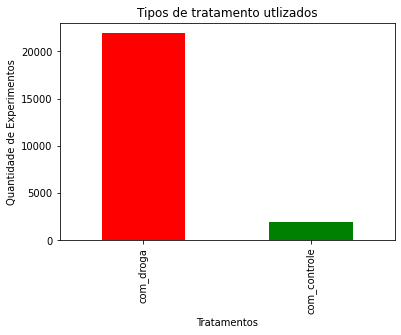

In [16]:
import matplotlib.pyplot as plt

dados_git.tratamento.value_counts().plot.bar(color=['red','green'])
plt.title('Tipos de tratamento utlizados')
plt.xlabel('Tratamentos')
plt.ylabel('Quantidade de Experimentos')
plt.show()


Desafio 08: Resumo do que você aprendeu com os dados

Com estes dados eu aprendi que estes experimentos precisam ser feitos com um grupo controle, que não recebe o tratamento e com o qual vão ser comparados os resultados.

Também é possível observar que os casos possuem temos de exposição diferentes, possibilitando assim notar as alterações nas expressões "genéticas" (não sei se o termo é denominado assim).

Também é possível notar que os dados coletados não apresentam um significado relevante se não forem devidamente tratados, ou que seja como no caso dos desafios listados, apenas separar e analisa-los de forma individual ou em um combinaçoes relevantes. 



AULA 2: ESTATÍSTICAS, VISUALIZAÇÃO DE DADOS E DISTRIBUIÇÕES

Neste aula vamos utilizar a biblioteca Seaborn para uma melhor visualização dos dados.

In [17]:
# remane de coluna
mapa = {'droga':'composto'}
dados_git.rename(columns=mapa, inplace = True)
dados_git

,id,tratamento,tempo,dose,composto,g0,g1,g2,g3,g4,g5,g6,g7,g8,g9,g10,g11,g12,g13,g14,g15,g16,g17,g18,g19,g20,g21,g22,g23,g24,g25,g26,g27,g28,g29,g30,g31,g32,g33,g34,...,c60,c61,c62,c63,c64,c65,c66,c67,c68,c69,c70,c71,c72,c73,c74,c75,c76,c77,c78,c79,c80,c81,c82,c83,c84,c85,c86,c87,c88,c89,c90,c91,c92,c93,c94,c95,c96,c97,c98,c99
0,id_000644bb2,com_droga,24,D1,b68db1d53,1.0620,0.5577,-0.2479,-0.6208,-0.1944,-1.0120,-1.0220,-0.0326,0.5548,-0.0921,1.1830,0.1530,0.5574,-0.4015,0.1789,-0.6528,-0.7969,0.6342,0.1778,-0.3694,-0.5688,-1.1360,-1.1880,0.6940,0.4393,0.2664,0.1907,0.1628,-0.2853,0.5819,0.2934,-0.5584,-0.0916,-0.3010,-0.1537,...,0.4805,0.4965,0.3680,0.8427,0.1042,0.1403,0.1758,1.2570,-0.5979,1.2250,-0.0553,0.7351,0.5810,0.9590,0.2427,0.0495,0.4141,0.8432,0.6162,-0.7318,1.2120,0.6362,-0.4427,0.1288,1.4840,0.1799,0.5367,-0.1111,-1.0120,0.6685,0.2862,0.2584,0.8076,0.5523,-0.1912,0.6584,-0.3981,0.2139,0.3801,0.4176
1,id_000779bfc,com_droga,72,D1,df89a8e5a,0.0743,0.4087,0.2991,0.0604,1.0190,0.5207,0.2341,0.3372,-0.4047,0.8507,-1.1520,-0.4201,-0.0958,0.4590,0.0803,0.2250,0.5293,0.2839,-0.3494,0.2883,0.9449,-0.1646,-0.2657,-0.3372,0.3135,-0.4316,0.4773,0.2075,-0.4216,-0.1161,-0.0499,-0.2627,0.9959,-0.2483,0.2655,...,0.4083,0.0319,0.3905,0.7099,0.2912,0.4151,-0.2840,-0.3104,-0.6373,0.2887,-0.0765,0.2539,0.4443,0.5932,0.2031,0.7639,0.5499,-0.3322,-0.0977,0.4329,-0.2782,0.7827,0.5934,0.3402,0.1499,0.4420,0.9366,0.8193,-0.4236,0.3192,-0.4265,0.7543,0.4708,0.0230,0.2957,0.4899,0.1522,0.1241,0.6077,0.7371
2,id_000a6266a,com_droga,48,D1,18bb41b2c,0.6280,0.5817,1.5540,-0.0764,-0.0323,1.2390,0.1715,0.2155,0.0065,1.2300,-0.4797,-0.5631,-0.0366,-1.8300,0.6057,-0.3278,0.6042,-0.3075,-0.1147,-0.0570,-0.0799,-0.8181,-1.5320,0.2307,0.4901,0.4780,-1.3970,4.6240,-0.0437,1.2870,-1.8530,0.6069,0.4290,0.1783,0.0018,...,-0.5477,-0.7576,-0.0444,0.1894,-0.0014,-2.3640,-0.4682,0.1210,-0.5177,-0.0604,0.1682,-0.4436,0.4963,0.1363,0.3335,0.9760,-0.0427,-0.1235,0.0959,0.0690,-0.9416,-0.7548,-0.1109,-0.6272,0.3019,0.1172,0.1093,-0.3113,0.3019,-0.0873,-0.7250,-0.6297,0.6103,0.0223,-1.3240,-0.3174,-0.6417,-0.2187,-1.4080,0.6931
3,id_0015fd391,com_droga,48,D1,8c7f86626,-0.5138,-0.2491,-0.2656,0.5288,4.0620,-0.8095,-1.9590,0.1792,-0.1321,-1.0600,-0.8269,-0.3584,-0.8511,-0.5844,-2.5690,0.8183,-0.0532,-0.8554,0.1160,-2.3520,2.1200,-1.1580,-0.7191,-0.8004,-1.4670,-0.0107,-0.8995,0.2406,-0.2479,-1.0890,-0.7575,0.0881,-2.7370,0.8745,0.5787,...,-2.1220,-0.3752,-2.3820,-3.7350,-2.9740,-1.4930,-1.6600,-3.1660,0.2816,-0.2990,-1.1870,-0.5044,-1.7750,-1.6120,-0.9215,-1.0810,-3.0520,-3.4470,-2.7740,-1.8460,-0.5568,-3.3960,-2.9510,-1.1550,-3.2620,-1.5390,-2.4600,-0.9417,-1.5550,0.2431,-2.0990,-0.6441,-5.6300,-1.3780,-0.8632,-1.2880,-1.6210,-0.8784,-0.3876,-0.8154
4,id_001626bd3,com_droga,72,D2,7cbed3131,-0.3254,-0.4009,0.9700,0.6919,1.4180,-0.8244,-0.2800,-0.1498,-0.8789,0.8630,-0.2219,-0.5121,-0.9577,1.1750,0.2042,0.1970,0.1244,-1.7090,-0.3543,-0.5160,-0.3330,-0.2685,0.7649,0.2057,1.3720,0.6835,0.8056,-0.3754,-1.2090,0.2965,-0.0712,0.6389,0.6674,-0.0783,1.1740,...,-0.2274,0.3215,0.1535,-0.4640,-0.5943,0.3973,0.1500,0.5178,0.5159,0.6091,0.1813,-0.4249,0.7832,0.6529,0.5648,0.4817,0.0587,0.5303,0.6376,-0.3966,-1.4950,-0.9625,-0.0541,0.6273,0.4563,0.0698,0.8134,0.1924,0.6054,-0.1824,0.0042,0.0048,0.6670,1.0690,0.5523,-0.3031,0.1094,0.2885,-0.3786,0.7125
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23809,id_fffb1ceed,com_droga,24,D2,df1d0a5a1,0.1394,-0.0636,-0.1112,-0.5080,-0.4713,0.7201,0.5773,0.3055,-0.4726,0.1269,0.2531,0.1730,-0.4532,-1.0790,0.2474,-0.4550,0.3588,0.1600,-0.7362,-0.1103,0.8550,-0.4139,0.5541,0.2310,-0.5573,-0.4397,-0.9260,-0.2424,-0.6686,0.2326,0.6456,0.0136,-0.5141,-0.6320,0.7166,...

In [18]:
# como possuimos mt compostos seria interessante plotar apenas os 5 mais utilizados
cod_composto = dados_git.composto.value_counts().index[:5]
cod_composto

dados_git.query('composto in @cod_composto')

,id,tratamento,tempo,dose,composto,g0,g1,g2,g3,g4,g5,g6,g7,g8,g9,g10,g11,g12,g13,g14,g15,g16,g17,g18,g19,g20,g21,g22,g23,g24,g25,g26,g27,g28,g29,g30,g31,g32,g33,g34,...,c60,c61,c62,c63,c64,c65,c66,c67,c68,c69,c70,c71,c72,c73,c74,c75,c76,c77,c78,c79,c80,c81,c82,c83,c84,c85,c86,c87,c88,c89,c90,c91,c92,c93,c94,c95,c96,c97,c98,c99
7,id_0020d0484,com_droga,48,D1,8b87a7a83,0.2711,0.5133,-0.1327,2.5950,0.6980,0.5846,-0.2633,-2.1490,0.4881,1.4750,-0.0488,-0.0561,0.1641,0.1749,-0.3464,-0.1811,0.5685,1.2970,1.0510,-0.9585,0.7911,-0.2991,2.7420,-0.5979,-1.0240,0.7268,0.1590,-1.9730,1.1340,-2.5720,0.2068,0.9992,-0.1958,0.2262,1.0140,...,-0.2623,-0.5500,-0.0530,0.2077,-0.0825,0.2156,0.8142,1.0990,1.0860,0.4011,-0.1342,0.4653,-0.1104,0.3935,1.2370,-0.5072,0.0351,0.5084,-0.1248,0.4351,0.1389,0.6726,0.6070,0.3431,-0.4116,0.1194,0.3420,0.1331,0.8541,0.6282,0.3230,-0.4140,0.2532,0.0513,0.8600,1.4250,0.6633,0.4562,-0.9622,0.0260
16,id_002fb9c19,com_droga,48,D1,87d714366,8.7380,0.1914,2.4380,-0.2930,3.2010,1.4910,5.3920,-1.0420,-8.4860,-2.5790,-6.7470,3.6150,-1.4510,0.6909,-0.7623,-2.9400,-9.2850,-6.7110,-0.4195,1.1600,-1.3180,1.3660,-1.4020,-2.6220,0.7204,-2.5930,-4.0630,-0.8282,-3.5000,0.9206,-5.1450,9.8040,-2.6840,-2.4390,-0.1427,...,-10.0000,-9.5910,-10.0000,-10.0000,-8.5110,-10.0000,-10.0000,-10.0000,-10.0000,-8.8870,-10.0000,-10.0000,-10.0000,-10.0000,-4.9020,-9.9840,-5.5520,-9.9840,-9.9840,-9.9840,-9.9840,-9.9840,-9.9840,-9.9840,-9.9840,-9.9840,-9.7960,-8.1770,-9.8990,-9.9840,-9.9840,-9.9840,-9.9840,-9.9840,-9.9840,-9.9840,-9.9840,-9.9840,-9.9840,-6.7840
25,id_0054388ec,com_controle,48,D1,cacb2b860,-0.6696,-0.2718,-1.2230,-0.6226,-0.7220,0.1588,0.7785,0.7062,-0.7951,1.3770,0.2856,-0.8331,0.3879,1.3290,-0.4746,0.0857,-0.2745,-0.1093,0.2603,0.7386,-0.6665,-1.6520,-0.9262,0.0000,1.6310,-0.2933,0.2043,-2.2070,0.1383,-0.4966,0.6922,-0.4077,0.2303,-0.0456,-0.7447,...,0.6976,-0.0178,0.3768,0.4318,-0.1051,0.3933,-0.3189,0.4128,-0.2116,-1.0410,0.7798,0.1579,1.7250,1.4490,0.9117,-0.0754,-0.8396,0.7640,1.2080,1.1890,0.2114,0.6335,0.3265,-0.1056,0.5478,0.7477,1.2340,0.5035,-0.6591,0.3023,0.6171,0.6405,0.5429,0.3562,1.3290,0.5573,0.8837,0.5534,0.8976,1.0050
38,id_0079af0fb,com_controle,24,D1,cacb2b860,-0.1636,-1.8230,-0.5211,0.3054,-1.1280,0.6041,0.3856,-0.1670,-0.5400,0.2721,-0.2479,0.0761,-0.4054,2.9760,-0.7679,0.6995,0.0752,0.5943,0.4266,0.0000,1.0410,-0.1131,0.6593,-0.6890,0.5115,-0.2512,-0.8775,-1.3810,0.1419,-0.0363,0.2559,2.5290,0.2853,1.4690,-0.3626,...,-0.3420,0.2815,-0.7493,-0.2701,0.1205,0.2396,0.3506,-0.9233,0.2490,-0.0824,0.4841,1.1940,-1.1650,-0.4853,1.1080,-0.5979,0.7438,0.2050,-0.2761,-0.1748,0.3385,-0.3500,-0.0309,-0.0409,-0.0735,0.2732,-1.2100,0.0089,0.0317,0.4721,-0.3880,-0.6828,-0.6594,-0.2043,0.3571,-0.1319,0.2187,0.0737,0.6498,-1.4820
40,id_007bfbb91,com_controle,24,D2,cacb2b860,-1.3200,-1.7340,-0.0741,1.5440,-1.8290,-0.0951,0.3829,-1.8700,-0.0324,2.7670,-0.0438,-0.0147,0.1276,0.2968,-0.0704,-0.3767,2.5790,0.4069,-0.3868,-0.2782,1.8180,-2.9390,-0.1150,-0.8009,-1.4440,0.5412,-0.0804,-0.4444,2.9230,2.8270,-0.3437,1.6570,-1.9200,0.3442,1.7160,...,0.4009,0.7649,0.2789,0.4465,0.9492,0.6385,1.5510,-0.1220,0.6688,0.4396,0.6947,0.9761,1.2430,1.4770,-0.0081,1.0040,1.4420,-0.3482,0.3297,1.2070,0.0524,0.5346,0.7643,0.4067,0.3817,0.4566,0.7736,0.5316,0.2790,0.9735,0.7412,1.0340,0.7393,1.1020,0.3786,0.2636,-0.5751,0.3362,0.8543,0.9180
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23793,id_ffd26f361,com_controle,48,D2,cacb2b860,0.6008,0.2781,-0.3319,-0.8782,0.9281,0.7535,0.5971,1.6350,-0.3146,0.4984,-1.1890,0.3772,-0.8196,0.1083,-2.0350,0.4135,0.7586,-0.4024,-0.0449,0.3335,0.2358,0.7919,-0.8775,0.4232,1.8460,-2.0940,0.1438,-0.6604,0.7243,0.0338,-0.0182,-0.2022,0.8827,

Agora que vimos que a nossa filtragem funcionou e que temos como retorno uma base de dados com 3.235 linhas, podemos usar a função querycomo parâmetro para o countplot, o nosso gráfico de barras. O countplot é um gráfico pré-programado da biblioteca Seaborne, por isso, precisaremos fazer a importação padrão da mesma (import seaborn as sns). Adicionalmente, aqui no Google Colaboratory, para que possamos enxergar o gráfico com os padrões de configuração da biblioteca, precisamos rodar sns.set(). Além disso, para refinar a apresentação do gráfico, podemos utilizar algumas funcionalidades da biblioteca Matplotlib (fazendo, primeiramente, sua importação - import matplotlib.pyplt as plt). Também estamos definindo o tamanho do gráfico através da função figure e seu parâmetro figsize=(x, y)) e o título através do set_title('Título'). Como comentado na aula, usualmente, armazenamos o nosso gráfico em uma variável ax e então, definimos as demais configurações (por exemplo, ax.set_title('Título'). E, finalmente, para visualizar o gráfico de barras, usamos o plt.show()

A base de dados que usamos até o momento tem uma variável chamada droga que entendemos, com a ajuda da Vanessa, que essa não é a melhor nomenclatura para representa-la. Por isso, vamos usar a função map da biblioteca Pandas para renomear essa coluna. É importante destacar que passamos o parâmetro inplace = True, esse parâmetro faz com que os dados sejam modificados no local e o dataframe será atualizado. Caso esse parâmetro não seja declarado, o default é inplace = False e o retorno será uma cópia do objeto e caso você queira, precisa salva-lo com um outro nome.

Desafio 01: Ordenar o gráfico countplot e Desafio 02: Melhorar a visualização alterando tamanho da fonte...


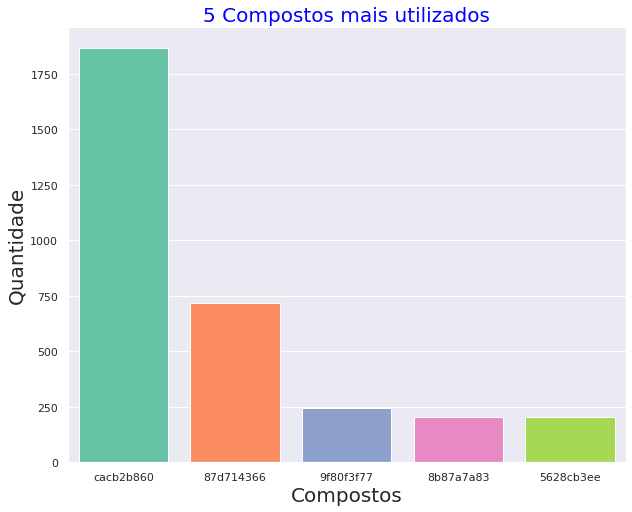

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
sns.set()
ndata = dados_git.query('composto in @cod_composto')
ax = sns.countplot(x = 'composto' , saturation=2, palette = "Set2",data = ndata, order=ndata.composto.value_counts().index[0:5:1] )
# plot em ordem crescente
# para plot em ordem decrescente index[5:0:-1]
ax.axes.set_title("5 Compostos mais utilizados",fontsize=20, color='blue')
ax.set_xlabel("Compostos",fontsize=20)
ax.set_ylabel("Quantidade",fontsize=20)
plt.show()
# aqui com o comando set_label/title foi alterado o tamanho da fonte do título e labels

Desafio 03: Plotar os histogramas com seaborn

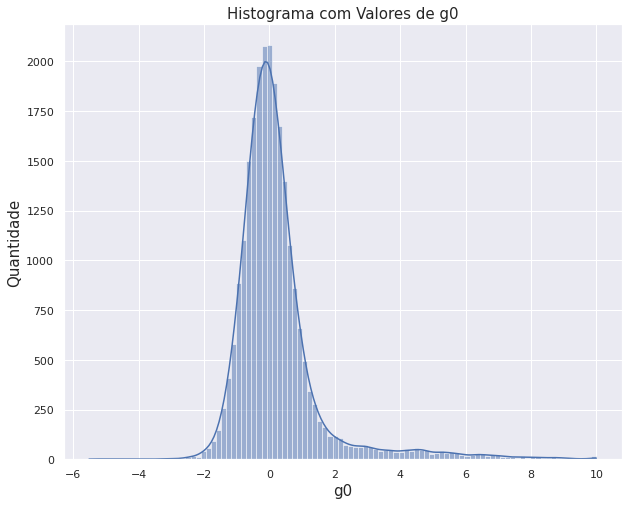

In [20]:
plt.figure(figsize=(10,8))
ax = sns.histplot(data=dados_git,x='g0',bins=100,kde=True)
ax.axes.set_title("Histograma com Valores de g0",fontsize=15)
ax.set_xlabel("g0",fontsize=15)
ax.set_ylabel("Quantidade",fontsize=15)
plt.show()


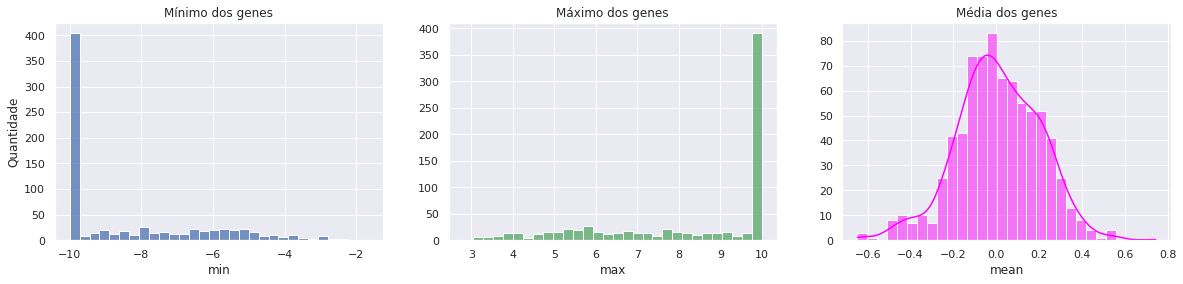

In [21]:
fig, ax = plt.subplots(1,3, figsize =(20,4))
ax1 = sns.histplot(data=dados_git.loc[:,'g0':'g771'].describe().T['min'],bins=30,ax=ax[0]).set_title("Mínimo dos genes")
ax2 = sns.histplot(data=dados_git.loc[:,'g0':'g771'].describe().T['max'],bins=30,ax=ax[1], color='g').set_title("Máximo dos genes")
ax3 = sns.histplot(data=dados_git.loc[:,'g0':'g771'].describe().T['mean'],bins=30,kde=True,color='magenta',ax=ax[2]).set_title('Média dos genes')
ax[0].set(ylabel= "Quantidade")
ax[1].set(ylabel= "  ")
ax[2].set(ylabel= "  ")

plt.show()


Desafio 06: Fazer outras análises com o boxplot e até com o histograma.

In [22]:
max_g= dados_git.loc[:,'g0':'g771'].describe().T.sort_values('mean',ascending=False)
max_g

,count,mean,std,min,25%,50%,75%,max
g707,23814.0,0.744700,1.457132,-1.672,0.000000,0.00000,1.004000,10.000
g100,23814.0,0.553186,2.152067,-5.915,-0.519275,-0.06260,0.544700,10.000
g744,23814.0,0.548903,2.023791,-2.912,-0.464000,0.00085,0.646325,10.000
g392,23814.0,0.537320,1.989753,-4.156,-0.460775,-0.01695,0.615200,10.000
g38,23814.0,0.534425,2.003317,-10.000,-0.470250,0.00580,0.642300,10.000
...,...,...,...,...,...,...,...,...
g672,23814.0,-0.502762,1.977761,-10.000,-0.562775,0.01640,0.475200,3.433
g50,23814.0,-0.588018,2.256983,-10.000,-0.563700,0.01010,0.496875,4.889
g37,23814.0,-0.606710,2.200277,-10.000,-0.604100,-0.00070,0.460500,5.602
g508,23814.0,-0.641689,1.934176,-10.000,-0.867400,-0.05065,0.439075,5.268


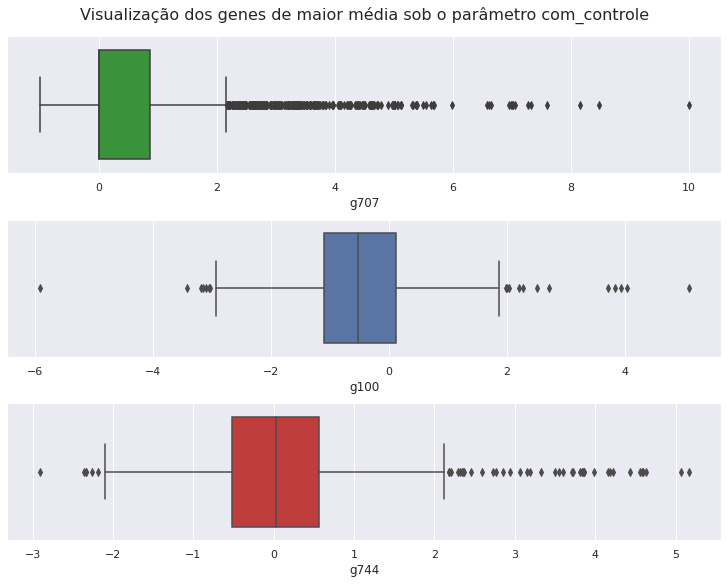

In [23]:
  fig, ax = plt.subplots(3, constrained_layout=True,figsize =(10,8))

box1=sns.boxplot(data=dados_git[dados_git.tratamento == 'com_controle'], x='g707',ax=ax[0], color ='tab:green')
box2=sns.boxplot(data=dados_git[dados_git.tratamento == 'com_controle'], x='g100',ax=ax[1],)
box3 = sns.boxplot(data=dados_git[dados_git.tratamento == 'com_controle'], x='g744',ax=ax[2], color= 'tab:red')
fig.suptitle('Visualização dos genes de maior média sob o parâmetro com_controle', fontsize=16)
#ax.set_xlabel("Tipos de tratamento",fontsize=15, color='b')
plt.show()


Desafio 07: Resumo do que você aprendeu com os dados



Neste novo desafo nos foi apresentadas uma nova ferramenta de visualização de dados a biblioteca seaborn. Essa biblioteca é uma das mais utilizadas para a análise exploratoria de dados (EDA) quando se trabalha com a linguagem python. Com graficos de box, histogramas e de distribuição normal é possivel ver que como as variáveis se correlacionam entre si, ou como seus valores estão distribuidos na base de dados. Algumas vizualizações já nos permitem ter insights de como determinado gene reaje ao tratamento com determinada droga e comparar com outros genes

Aula 03

Na aula anterior, pudemos entender a importância da construção de gráficos na visualização dos dados. Discutimos principalmente os histogramas e boxplots e, além disso, também falamos sobre a função describe do Pandas.

Você conseguiu fazer todos os desafios? Então vamos mergulhar juntos na aula 03!

Hoje, nosso foco é nos aprofundar ainda mais na base de dados e entender mais sobre a relação entre as nossas variáveis.

Olhando para o nosso conjunto de dados, percebemos que temos dados de tratamento, tempo, dosagem, composto químico usado e os dados genéticos. E os primeiros dados que vamos relacionar são aqueles ligados ao tratamento e, como já vimos anteriormente, estes são dados categóricos.

Um dos vieses de análise está relacionado às proporções destas categorias e, como aprendemos na aula anterior, um gráfico de frequências pode ser muito útil nesse aspecto.

Desafios


Desafio 01: Criar tabelas de frequência com pandas.groupby()

In [58]:
teste_dados= dados_git.loc[:,'g0':'g771'].var().T.sort_values(ascending=True)
teste_dados
# aqui listamos os genes de menor variâcia

g219    0.577300
g307    0.602029
g104    0.621391
g550    0.623064
g331    0.630456
          ...   
g100    2.152067
g228    2.163439
g37     2.200277
g75     2.254701
g50     2.256983
Length: 772, dtype: float64

In [87]:
dados_git.composto.value_counts()
#lista dos compostos mais utilizados

cacb2b860    1866
87d714366     718
9f80f3f77     246
8b87a7a83     203
5628cb3ee     202
             ... 
d75904698       1
4d7280c91       1
a6334fda8       1
e3fe7b417       1
b472193a9       1
Name: composto, Length: 3289, dtype: int64

In [37]:
tab = dados_git.groupby(['dose','tempo']).tratamento.value_counts()
tab

dose  tempo  tratamento  
D1    24     com_droga       3585
             com_controle     301
      48     com_droga       4011
             com_controle     343
      72     com_droga       3600
             com_controle     307
D2    24     com_droga       3581
             com_controle     305
      48     com_droga       3591
             com_controle     305
      72     com_droga       3580
             com_controle     305
Name: tratamento, dtype: int64

In [86]:
tab = dados_git.query('composto =="87d714366"').groupby(['dose','tempo']).g219.var()
tab.unstack()
# variação do gene 219 (esse gene foi escolhido por possuir a menor variância dentre todos) sob influencia do composto 87d714366

tempo,24,48,72
dose,,,
D1,0.456714,1.123423,2.572708
D2,0.541822,1.247199,2.327642


In [88]:
tab2 = dados_git.query('composto =="87d714366"').groupby(['dose','tempo']).g307.var()
tab2.unstack()
# variação do gene 307 (esse gene foi escolhido por possuir a segunda menor variância dentre todos) sob influencia do composto 87d714366

tempo,24,48,72
dose,,,
D1,1.720016,3.295415,2.931444
D2,1.015794,1.316407,2.517503


Desafio 02: Normalizar o crosstab pela coluna.


In [110]:
import pandas as pd

pd.crosstab([dados_git.dose,dados_git.tempo],dados_git.tratamento, values=dados_git.g219, aggfunc=(min,max),normalize='columns')

max                    min          
tratamento com_controle com_droga com_controle com_droga
dose tempo                                              
D1   24        0.293160  0.149760     0.109210  0.136141
     48        0.127215  0.160020     0.137914  0.186905
     72        0.186320  0.150990     0.127767  0.171618
D2   24        0.158961  0.140435     0.279405  0.159576
     48        0.113420  0.152762     0.196579  0.159792
     72        0.120924  0.246033     0.149125  0.185968

Desafio 03: Explorar outros agregadores.

In [138]:
agg = dados_git.groupby(['dose','tempo','tratamento']).g219.agg(['std','var'])
agg.unstack()

std                    var          
tratamento com_controle com_droga com_controle com_droga
dose tempo                                              
D1   24        0.625526  0.473714     0.391282  0.224405
     48        0.531754  0.528864     0.282762  0.279698
     72        0.541559  0.547301     0.293286  0.299538
D2   24        0.612873  0.620641     0.375613  0.385196
     48        0.604048  0.616462     0.364874  0.380025
     72        0.562619  0.653639     0.316541  0.427244

Desafio 04: Explorar o melt.

In [154]:
pd.melt(dados_git,id_vars=['tratamento','tempo','dose','composto'],value_vars='g219',var_name='Gene',value_name='Valores')

,tratamento,tempo,dose,composto,Gene,Valores
0,com_droga,24,D1,b68db1d53,g219,0.2482
1,com_droga,72,D1,df89a8e5a,g219,-0.4611
2,com_droga,48,D1,18bb41b2c,g219,-0.1942
3,com_droga,48,D1,8c7f86626,g219,0.2921
4,com_droga,72,D2,7cbed3131,g219,-0.5558
...,...,...,...,...,...,...
23809,com_droga,24,D2,df1d0a5a1,g219,0.1666
23810,com_droga,24,D2,ecf3b6b74,g219,0.9524
23811,com_controle,48,D2,cacb2b860,g219,-0.1977
23812,com_droga,24,D1,8b87a7a83,g219,0.2283


Desafio 05: Calcular e analisar a correlação entre G e C. Refletir sobre os efeitos biológicos  e Desafio 06: Estudar o código que plota a matriz de correlação (heatmap)

In [159]:
# para analisar a correlação entre os genes e células é necessário que ambos tenham matrizes da mesma dimensão
table1 = dados_git.query('tratamento =="com_droga"').loc[:,'g0':'g49']
table2 = dados_git.query('tratamento =="com_droga"').loc[:,'c0':'c49']


,c0,c1,c2,c3,c4,c5,c6,c7,c8,c9,c10,c11,c12,c13,c14,c15,c16,c17,c18,c19,c20,c21,c22,c23,c24,c25,c26,c27,c28,c29,c30,c31,c32,c33,c34,c35,c36,c37,c38,c39,c40,c41,c42,c43,c44,c45,c46,c47,c48,c49
0,-0.0600,0.1083,0.6864,0.4043,0.4213,-0.6797,0.2888,0.4323,-0.3381,0.3407,0.9084,0.6857,1.0620,0.7602,-0.1048,0.3594,0.6376,-0.2798,-0.4010,0.6842,1.1560,0.3522,-0.3971,-0.2115,-0.2687,0.5196,0.1594,0.8920,0.6485,0.6078,0.3799,-0.1727,0.3817,0.3600,0.5124,-0.1414,0.6159,0.4689,-0.0773,0.4728,-0.0143,-0.5344,0.3578,0.3248,0.8903,0.3431,1.0340,1.3070,-1.0230,0.7709
1,0.0927,0.2723,0.2772,0.7776,0.3679,0.5696,0.2835,1.4080,0.3745,0.6775,0.7787,0.2074,1.1110,0.2433,0.2010,0.7094,-0.4210,-0.2274,0.4045,0.1138,0.9950,0.0087,0.4864,-0.0140,0.0164,0.1759,0.6654,0.3556,0.8175,0.0474,0.5589,0.4481,0.1888,0.3712,0.7837,0.6860,0.4123,0.1560,-0.1203,-1.2780,0.6743,0.7358,0.1334,-0.5193,0.2281,0.0158,-0.5658,0.6065,0.6259,0.4716
2,-0.1312,-1.4640,0.3394,-1.7790,0.2188,0.5826,-0.7513,0.0543,0.7182,-0.4159,0.3084,-0.0899,-0.0397,-0.5077,-0.5072,0.0100,-0.6915,0.0643,-0.8927,-0.2048,0.0773,0.5971,-0.1602,-0.2028,-0.2216,-1.1380,0.3668,-1.0620,-0.7736,0.6225,0.6274,-0.3038,0.1171,-0.0550,-0.0289,1.1740,-0.7937,-1.0610,-0.6409,0.3884,-1.0330,-0.0055,0.1212,-0.7020,-0.7065,-0.5192,-0.3181,0.1787,0.3354,0.1349
3,-0.3998,-4.5520,-2.7350,-1.9630,-2.8610,-1.2670,-2.5830,-0.5036,-3.1590,-1.8510,-2.2730,-4.6920,-1.2750,-1.4970,-0.0156,-1.9350,-1.3430,-0.5252,-2.7210,-0.2524,0.9197,-3.1220,-1.9180,-0.6761,-2.8360,-1.6890,-4.4990,-1.5190,-2.2730,-0.3250,0.1895,-2.4220,0.0670,-1.9870,-0.6482,-0.0023,-1.9930,-0.8042,-3.6160,-0.3487,-1.2560,-2.7220,-2.1970,-2.9030,-1.1030,-2.3020,-2.0030,-1.3390,-3.0160,-3.0040
4,-0.3774,0.7364,-0.1659,0.2341,1.0060,0.3204,-0.0852,-0.2284,-0.2533,-0.3174,0.9642,-0.0853,0.1559,0.1419,0.1197,0.6774,0.1332,-0.5176,0.1232,0.0827,0.6995,0.5953,1.0600,-0.4255,0.8624,1.0010,0.0840,-0.6553,-0.1093,0.0587,0.5490,0.6331,0.5227,0.2186,0.2781,0.8947,-0.0202,0.5966,0.2249,0.5671,0.6382,-0.3909,0.7040,0.1462,0.0655,-0.5605,0.5903,-0.2353,-0.1285,-0.1740
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23808,0.9538,-0.8733,-0.2969,-0.7964,0.2447,-0.1552,-0.2402,-0.3265,-0.1232,0.6442,0.0523,0.1678,-0.5853,0.3106,0.6050,0.3089,0.5085,0.7467,0.0320,-0.7075,-0.5713,0.1213,0.1063,0.7528,0.2746,-0.1976,0.2656,0.4237,0.4498,-0.1849,-0.5164,-0.4928,0.3341,-0.1388,0.3086,-0.4474,1.3780,-0.5364,-0.0218,0.0419,-0.0433,0.0054,0.0597,0.0708,0.8532,0.2379,0.2558,0.3631,-0.0474,-0.6761
23809,0.4224,0.1871,-0.4822,0.3713,0.4754,0.9512,0.4650,0.3005,0.0338,-0.7734,0.3922,-0.0028,1.3250,0.3832,1.4350,-0.3465,-0.6813,-0.0440,0.0016,-0.7588,0.5373,-0.3728,0.1439,0.3021,-0.0546,0.7490,-0.1772,1.0870,0.9235,0.7491,1.0560,-0.3548,0.4730,0.3669,0.3175,0.0836,-0.0980,-0.2717,-0.2635,-0.0231,0.1908,0.7024,0.6459,-0.8431,-0.1879,0.8394,0.5270,-0.6097,0.7577,0.0365
23810,0.2144,0.4350,0.1174,1.3960,-0.6772,0.2316,-0.5396,0.0581,0.6067,-0.4622,0.1112,1.4440,-0.8000,0.3615,-0.4301,-0.0562,-0.2590,-1.3780,-0.3346,0.0869,-0.1766,-0.1957,0.8420,-0.9363,-0.6085,0.9446,-0.8192,0.7525,-0.3499,0.2467,-0.2245,0.2532,-1.8510,0.0680,0.8498,-0.5285,0.3788,0.2031,0.9963,0.0844,0.5501,0.7954,-0.7949,0.5596,-0.4925,0.4604,-0.5548,-0.7309,0.2137,-0.1295
23812,0.5377,1.3240,0.9679,0.1419,1.2230,0.3404,-0.1589,0.8667,0.7749,-0.1458,0.4287,0.6342,-0.3830,-0.0918,-0.1479,1.4290,0.2736,0.9842,0.3394,-0.1685,0.3873,-0.1351,-1.0770,0.7400,0.7976,0.2998,0.2517,0.4569,-0.6226,0.2499,1.7530,0.2476,0.1594,-0.4389,0.9799,-0.5447,0.1770,1.2550,0.4623,-0.8128,0.9177,0.7495,-0.4439,0.7247,0.7867,0.7962,0.3351,0.5460,-0.7703,-0.1128


In [161]:
# agora que os genes e células possuem a mesma dimenssão é possível contaten=a-los
new_table = pd.concat([table1, table2], axis = 1) #(juntar os dataframes por coluna)
# agora é possível calcular a correlação entre os genes e células

,g0,g1,g2,g3,g4,g5,g6,g7,g8,g9,g10,g11,g12,g13,g14,g15,g16,g17,g18,g19,g20,g21,g22,g23,g24,g25,g26,g27,g28,g29,g30,g31,g32,g33,g34,g35,g36,g37,g38,g39,...,c10,c11,c12,c13,c14,c15,c16,c17,c18,c19,c20,c21,c22,c23,c24,c25,c26,c27,c28,c29,c30,c31,c32,c33,c34,c35,c36,c37,c38,c39,c40,c41,c42,c43,c44,c45,c46,c47,c48,c49
0,1.0620,0.5577,-0.2479,-0.6208,-0.1944,-1.0120,-1.0220,-0.0326,0.5548,-0.0921,1.1830,0.1530,0.5574,-0.4015,0.1789,-0.6528,-0.7969,0.6342,0.1778,-0.3694,-0.5688,-1.1360,-1.1880,0.6940,0.4393,0.2664,0.1907,0.1628,-0.2853,0.5819,0.2934,-0.5584,-0.0916,-0.3010,-0.1537,0.2198,0.2965,-0.5055,-0.5119,-0.2162,...,0.9084,0.6857,1.0620,0.7602,-0.1048,0.3594,0.6376,-0.2798,-0.4010,0.6842,1.1560,0.3522,-0.3971,-0.2115,-0.2687,0.5196,0.1594,0.8920,0.6485,0.6078,0.3799,-0.1727,0.3817,0.3600,0.5124,-0.1414,0.6159,0.4689,-0.0773,0.4728,-0.0143,-0.5344,0.3578,0.3248,0.8903,0.3431,1.0340,1.3070,-1.0230,0.7709
1,0.0743,0.4087,0.2991,0.0604,1.0190,0.5207,0.2341,0.3372,-0.4047,0.8507,-1.1520,-0.4201,-0.0958,0.4590,0.0803,0.2250,0.5293,0.2839,-0.3494,0.2883,0.9449,-0.1646,-0.2657,-0.3372,0.3135,-0.4316,0.4773,0.2075,-0.4216,-0.1161,-0.0499,-0.2627,0.9959,-0.2483,0.2655,-0.2102,0.1656,0.5300,-0.2568,-0.0455,...,0.7787,0.2074,1.1110,0.2433,0.2010,0.7094,-0.4210,-0.2274,0.4045,0.1138,0.9950,0.0087,0.4864,-0.0140,0.0164,0.1759,0.6654,0.3556,0.8175,0.0474,0.5589,0.4481,0.1888,0.3712,0.7837,0.6860,0.4123,0.1560,-0.1203,-1.2780,0.6743,0.7358,0.1334,-0.5193,0.2281,0.0158,-0.5658,0.6065,0.6259,0.4716
2,0.6280,0.5817,1.5540,-0.0764,-0.0323,1.2390,0.1715,0.2155,0.0065,1.2300,-0.4797,-0.5631,-0.0366,-1.8300,0.6057,-0.3278,0.6042,-0.3075,-0.1147,-0.0570,-0.0799,-0.8181,-1.5320,0.2307,0.4901,0.4780,-1.3970,4.6240,-0.0437,1.2870,-1.8530,0.6069,0.4290,0.1783,0.0018,-1.1800,0.1256,-0.1219,5.4470,1.0310,...,0.3084,-0.0899,-0.0397,-0.5077,-0.5072,0.0100,-0.6915,0.0643,-0.8927,-0.2048,0.0773,0.5971,-0.1602,-0.2028,-0.2216,-1.1380,0.3668,-1.0620,-0.7736,0.6225,0.6274,-0.3038,0.1171,-0.0550,-0.0289,1.1740,-0.7937,-1.0610,-0.6409,0.3884,-1.0330,-0.0055,0.1212,-0.7020,-0.7065,-0.5192,-0.3181,0.1787,0.3354,0.1349
3,-0.5138,-0.2491,-0.2656,0.5288,4.0620,-0.8095,-1.9590,0.1792,-0.1321,-1.0600,-0.8269,-0.3584,-0.8511,-0.5844,-2.5690,0.8183,-0.0532,-0.8554,0.1160,-2.3520,2.1200,-1.1580,-0.7191,-0.8004,-1.4670,-0.0107,-0.8995,0.2406,-0.2479,-1.0890,-0.7575,0.0881,-2.7370,0.8745,0.5787,-1.6740,-1.6720,-1.2690,3.0900,-0.3814,...,-2.2730,-4.6920,-1.2750,-1.4970,-0.0156,-1.9350,-1.3430,-0.5252,-2.7210,-0.2524,0.9197,-3.1220,-1.9180,-0.6761,-2.8360,-1.6890,-4.4990,-1.5190,-2.2730,-0.3250,0.1895,-2.4220,0.0670,-1.9870,-0.6482,-0.0023,-1.9930,-0.8042,-3.6160,-0.3487,-1.2560,-2.7220,-2.1970,-2.9030,-1.1030,-2.3020,-2.0030,-1.3390,-3.0160,-3.0040
4,-0.3254,-0.4009,0.9700,0.6919,1.4180,-0.8244,-0.2800,-0.1498,-0.8789,0.8630,-0.2219,-0.5121,-0.9577,1.1750,0.2042,0.1970,0.1244,-1.7090,-0.3543,-0.5160,-0.3330,-0.2685,0.7649,0.2057,1.3720,0.6835,0.8056,-0.3754,-1.2090,0.2965,-0.0712,0.6389,0.6674,-0.0783,1.1740,-0.7110,-1.4470,1.0620,0.7888,-0.0848,...,0.9642,-0.0853,0.1559,0.1419,0.1197,0.6774,0.1332,-0.5176,0.1232,0.0827,0.6995,0.5953,1.0600,-0.4255,0.8624,1.0010,0.0840,-0.6553,-0.1093,0.0587,0.5490,0.6331,0.5227,0.2186,0.2781,0.8947,-0.0202,0.5966,0.2249,0.5671,0.6382,-0.3909,0.7040,0.1462,0.0655,-0.5605,0.5903,-0.2353,-0.1285,-0.1740
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23808,0.1608,-1.0500,0.2551,-0.2239,-0.2431,0.4256,-0.1166,-0.1777,-0.7480,0.1368,0.5493,-0.5083,0.4112,0.1181,0.7861,-0.1877,0.2476,0.1956,0.0273,0.1182,-0.5037,-0.5939,0.4825,-0.5187,0.1618,-0.2253,0.3153,0.4839,0.0520,1.3850,0.6502,-0.4198,0.2723,-0.3629,1.0820,-0.0352,0.1911,1.0900,0.0008,0.5474,...,0.0523,0.1678,-0.5853,0

In [168]:
corr = new_table.corr()
corr

(100, 100)

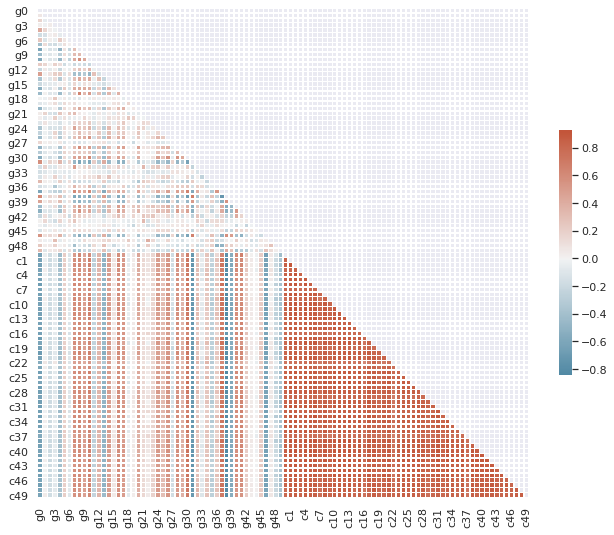

In [166]:
import numpy as np

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))
'''a variável mask é um triangulo superior (np.triu) de uma array das mesmas dimensões que nossa matrix de correlação
e seus valores são do tipo booleano e iguais a 1'''

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))
'''criando minha área de plot'''

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)
'''criando uma paleta de cores divergentes entre duas cores HUSL (cor 230 e cor 20) retornando um mapa de cores
para ser usado no plot heatmap'''

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, center=0, linewidths=.5, cbar_kws={"shrink": .5})

In [167]:
# ao plotar o heatmap dos genes e células é possível notar que a apresentação não é das melhores, sendo assim uma filtragem da tabela formada é necessáio]
# para uma exibição nao repetida
corr_novo = corr.loc[:'g49','c0' :]



(50, 50)

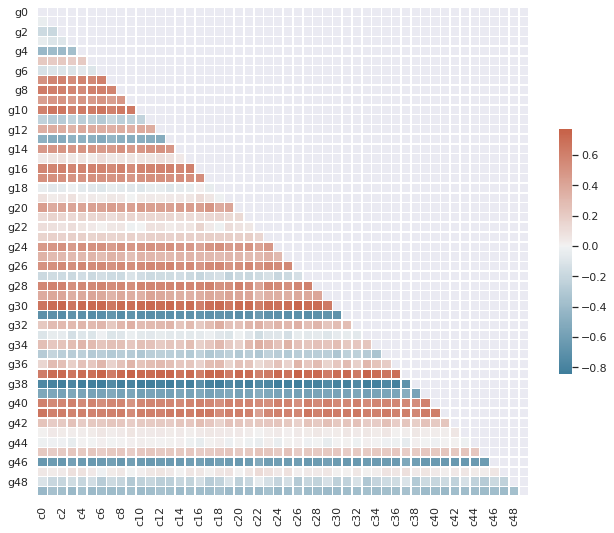

In [169]:
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr_novo, dtype=bool))
'''a variável mask é um triangulo superior (np.triu) de uma array das mesmas dimensões que nossa matrix de correlação
e seus valores são do tipo booleano e iguais a 1'''

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))
'''criando minha área de plot'''

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)
'''criando uma paleta de cores divergentes entre duas cores HUSL (cor 230 e cor 20) retornando um mapa de cores
para ser usado no plot heatmap'''

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_novo, mask=mask, cmap=cmap, center=0, linewidths=.5, cbar_kws={"shrink": .5})

  É possível observar que alguns genes possuem correlação positiva, podemos dizer que uma alta expressão desse gene está relacionado de alguma forma com a alta viabilidade celular, já que a correlação diz que ambos os valores tendem a mudar na mesma direção.
  Seria interessante fazer um estudo específicos sobre genes e variabilidade celular, pois, é possível perceber a variação celular, mas não podemos afirmar que a casualidade  

In [170]:
teste_dados= dados_git.loc[:,'c0':'c99'].var().T.sort_values(ascending=True)
teste_dados

c74    1.060529
c58    1.533651
c37    1.658342
c99    1.982232
c76    2.043014
         ...   
c6     4.991435
c26    5.148048
c18    5.266561
c38    5.277933
c63    5.326035
Length: 100, dtype: float64

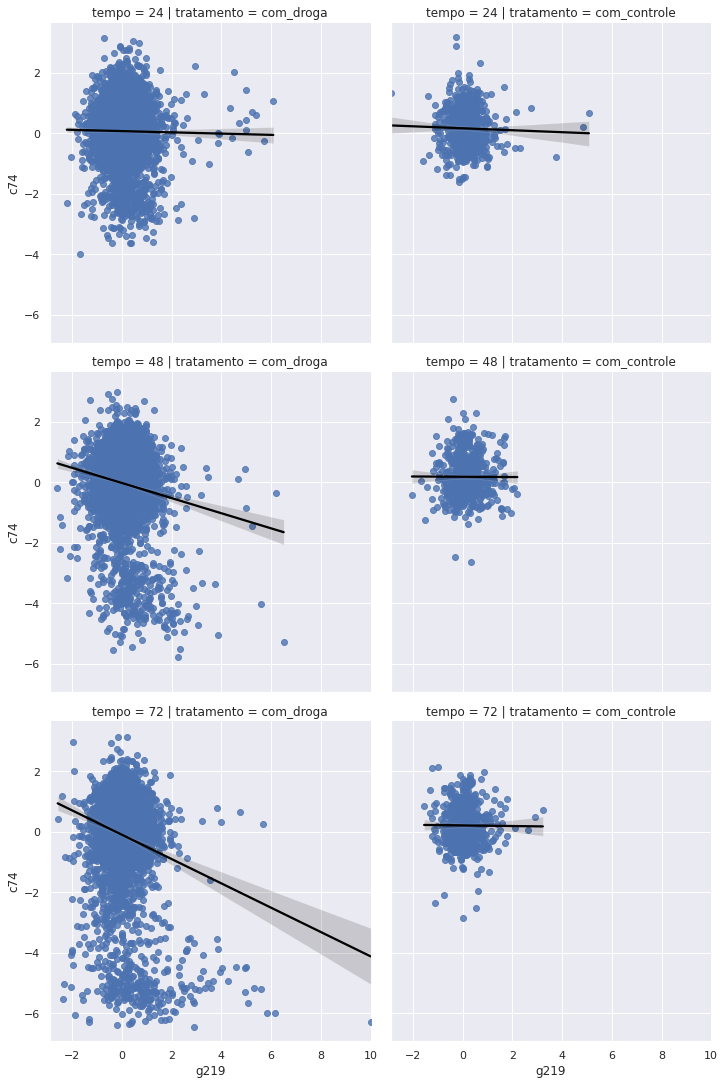

In [171]:
sns.lmplot(data=dados_git, x='g219', y='c74', line_kws={'color': 'black'}, col = 'tratamento',row='tempo')
# o gene 219 e a célula 74 não foram abordadas no heatmap, no entanto, uma demontração das duas foi definida a partir da variação de cada uma
# logo, a escolha entre elas foi definida como o gene e célula de menor variação

É possível visualizar as mudanças do g219 e c74 sob diversas circunstâncias. 
Por exemplo, par ao caso de tempo =72 e tratamento com_droga, é possível observar que o aumento da expressão gênica 219 está relacionado com a redução da variabilidade celular c74.

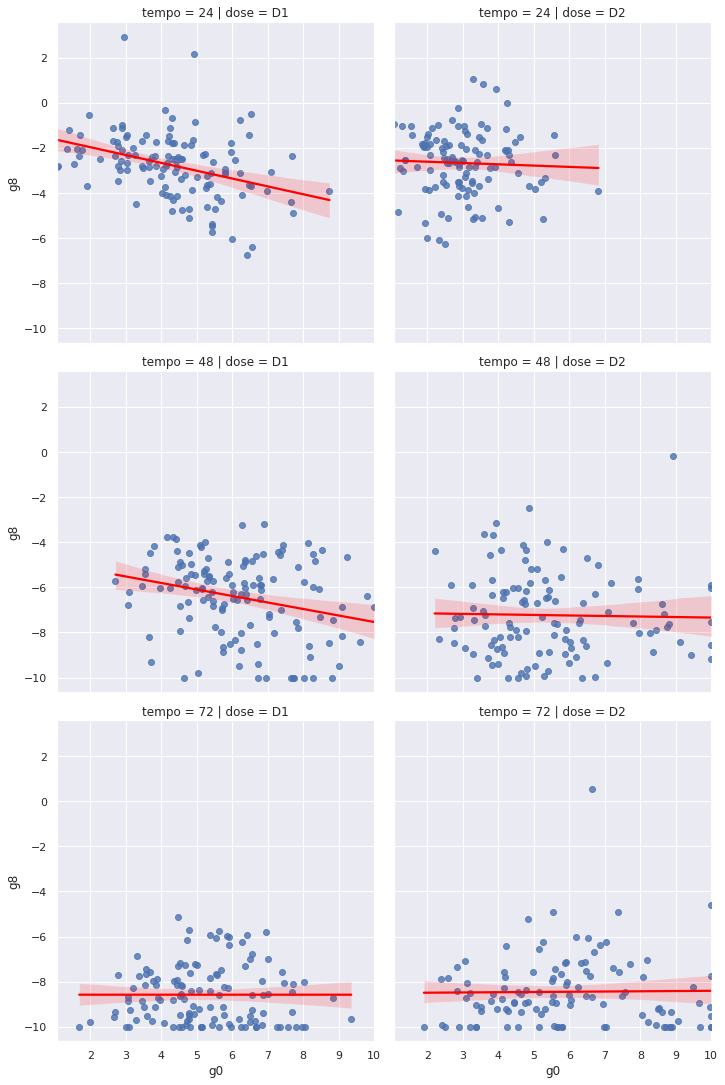

In [85]:
sns.lmplot(data=dados_git.query('composto =="87d714366"'), x='g0', y='g8', line_kws={'color': 'red'}, col = 'dose',row='tempo')

In [83]:
new=dados_git.query('composto == "87d714366"')
new

,id,tratamento,tempo,dose,composto,g0,g1,g2,g3,g4,g5,g6,g7,g8,g9,g10,g11,g12,g13,g14,g15,g16,g17,g18,g19,g20,g21,g22,g23,g24,g25,g26,g27,g28,g29,g30,g31,g32,g33,g34,...,c60,c61,c62,c63,c64,c65,c66,c67,c68,c69,c70,c71,c72,c73,c74,c75,c76,c77,c78,c79,c80,c81,c82,c83,c84,c85,c86,c87,c88,c89,c90,c91,c92,c93,c94,c95,c96,c97,c98,c99
16,id_002fb9c19,com_droga,48,D1,87d714366,8.738,0.1914,2.4380,-0.2930,3.2010,1.4910,5.3920,-1.0420,-8.486,-2.5790,-6.747,3.6150,-1.4510,0.6909,-0.7623,-2.9400,-9.285,-6.7110,-0.4195,1.1600,-1.3180,1.3660,-1.4020,-2.6220,0.7204,-2.5930,-4.063,-0.8282,-3.500,0.9206,-5.145,9.804,-2.6840,-2.4390,-0.1427,...,-10.000,-9.591,-10.000,-10.000,-8.511,-10.000,-10.000,-10.000,-10.000,-8.887,-10.000,-10.000,-10.000,-10.000,-4.902,-9.984,-5.552,-9.984,-9.984,-9.984,-9.984,-9.984,-9.984,-9.984,-9.984,-9.984,-9.796,-8.177,-9.899,-9.984,-9.984,-9.984,-9.984,-9.984,-9.984,-9.984,-9.984,-9.984,-9.984,-6.784
76,id_00cf039a7,com_droga,48,D2,87d714366,4.546,0.4257,0.7670,2.1950,2.5960,0.3677,-0.3854,-1.1590,-8.180,-2.1310,-4.168,2.5630,-1.3410,5.2610,-2.5680,1.0840,-3.835,-4.8440,0.8522,0.2435,-2.6090,0.3067,0.9733,-1.6080,-2.9210,-1.9570,-2.644,2.4030,-3.036,-6.4520,-3.258,4.355,-0.7562,0.9930,-0.2854,...,-9.995,-8.734,-7.370,-9.995,-6.135,-9.986,-8.504,-8.528,-9.995,-6.254,-9.995,-6.955,-9.995,-9.743,-3.457,-8.712,-3.972,-8.709,-10.000,-8.461,-9.347,-8.698,-9.807,-10.000,-10.000,-10.000,-5.657,-5.513,-8.284,-9.490,-8.729,-10.000,-7.834,-9.538,-10.000,-8.520,-10.000,-7.436,-6.918,-5.235
119,id_01534c4ee,com_droga,72,D2,87d714366,10.000,-1.2200,1.5150,-2.1910,4.3530,-0.9594,2.5600,-3.3120,-9.507,-3.3930,-4.160,-2.9320,0.0000,2.2650,-6.2560,0.1147,-4.209,-3.5580,3.2920,0.1551,-3.7200,0.1069,1.3000,1.9710,-9.9350,-1.8340,-1.072,0.2092,-1.989,-4.0390,-6.047,8.404,3.1040,-3.3390,-2.8780,...,-9.978,-9.978,-9.978,-9.978,-8.823,-9.978,-9.513,-9.832,-9.978,-6.568,-9.978,-8.664,-9.978,-9.978,-4.073,-10.000,-5.163,-7.797,-10.000,-8.297,-10.000,-10.000,-10.000,-10.000,-10.000,-10.000,-8.019,-8.688,-9.658,-9.308,-10.000,-10.000,-7.703,-10.000,-10.000,-9.054,-10.000,-8.771,-9.694,-5.548
209,id_0236e3425,com_droga,72,D1,87d714366,3.612,-1.7130,0.0313,-1.7360,3.3550,-1.7040,2.6010,-1.4530,-9.534,-2.8730,-4.465,-0.4308,-1.7920,3.8900,-3.4910,0.6124,-3.504,-4.4450,-1.4690,-2.8590,-1.4090,0.1560,-3.1610,-1.5710,0.0587,-0.0839,-3.619,-0.2986,-2.164,-2.1390,-3.929,7.451,-1.0450,4.2260,-3.5800,...,-10.000,-9.857,-10.000,-9.974,-9.062,-9.896,-10.000,-9.553,-10.000,-7.088,-10.000,-10.000,-10.000,-10.000,-4.432,-10.000,-6.025,-8.882,-10.000,-8.023,-10.000,-10.000,-10.000,-10.000,-10.000,-10.000,-8.517,-7.589,-10.000,-10.000,-10.000,-10.000,-8.451,-10.000,-10.000,-8.695,-10.000,-8.559,-8.025,-6.642
218,id_024a52260,com_droga,24,D2,87d714366,2.119,0.1098,1.1040,5.0620,-0.7427,-0.3564,-0.8253,-3.6180,-1.127,-2.1360,-3.371,5.4820,0.0537,8.0940,-1.3650,-1.4740,-4.195,0.0338,-0.2759,0.3821,-0.6859,-2.6870,0.1784,-1.0710,-4.1710,1.5710,-1.949,-1.0180,-4.791,-5.3540,-5.922,2.569,-1.5100,-2.7960,3.0740,...,-8.138,-6.541,-6.928,-9.313,-2.972,-8.412,-6.681,-7.150,-6.109,-4.503,-10.000,-5.367,-5.762,-5.173,-1.988,-7.265,-6.189,-5.044,-8.035,-4.652,-4.068,-6.564,-5.805,-8.420,-5.524,-6.696,-2.777,-3.348,-4.720,-5.357,-8.619,-7.332,-7.828,-9.679,-8.439,-2.047,-7.430,-5.861,-4.591,-3.533
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23680,id_fe8abffe0,com_droga,72,D1,87d714366,6.649,-0.4462,1.7370,0.0553,3.0330,-2.7360,0.4016,-4.5340,-9.746,-3.1160,-5.381,2.1980,-1.4490,6.8380,-5.0190,0.7382,-4.690,-4.5760,-1.5880,-3.1120,-5.5090,-1.4490,-2.2670,-1.7240,-1.2190,-2.5050,-5.049,0.9918,-4.635,-1.8910,-3.750,4.339,-0.5515,7.0970,-2.5690,...,-10.000,-10.000,-10.000,-10.000,-9.839,-10.000,-10.

Desafio 07: Resumo do que você aprendeu com os dados

Nessa aula, cotinuamos nós aprofundado em como tirar insights que vão ajudar e guiar as etapas seguintes do estudo sendo realizado. Começamos a enxergar como que certos compostos interferem na expressão de um gene e como isso está relacionado com a viabilidade celular de diferentes tipos de células.